In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import destroy, steadystate, wigner

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [36]:
# Define parameters
na = 3
G = [0.3j, 1, 1]
U = [0, 1/3, 1/3]
κ =  1
Δ = [0, 0, 2]

def Ham(G, U, Δ, a):
    
    return ((G/2) * a**2 + np.conj(G/2) *  a.dag()**2) + (U/2)*a.dag()**2 * a**2  - Δ*a.dag()*a

In [37]:
N = 30

a = destroy(N)
x = (a + a.dag())/np.sqrt(2)
p = -1j*(a - a.dag())/np.sqrt(2)

# Get Hamiltonians
H0, H1, H2 = [Ham(G[i], U[i], Δ[i], a) for i in range(3)]

# Define collapse operator
c_ops = [np.sqrt(κ)*a]

# Compute steady states
rho0, rho1, rho2 = [steadystate(Hi, c_ops) for Hi in [H0, H1, H2]]

In [41]:
# Get wigner function
X = P = np.linspace(-6, 6, 300)

# Make meshgrid
XX, PP = np.meshgrid(X, P)

w_list = [wigner(rhoi, X, P) for rhoi in [rho0, rho1, rho2]]

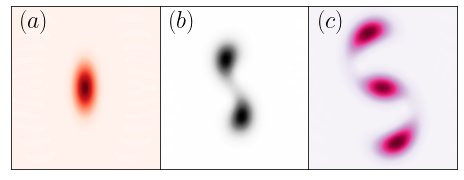

In [42]:
fig, axs = plt.subplots(1,3,sharex=True,sharey=True,figsize=(8,3))


ccolors = ['Reds','Greys','PuRd']
LETTERS = [r"$(a)$",r"$(b)$",r"$(c)$"]

for i, ax in enumerate(axs.flat):
    ax.contourf(X, X, w_list[i], 100, cmap = plt.cm.get_cmap(ccolors[i]))
        
    ax.annotate(LETTERS[i], (0.07,0.87), fontsize = 24, xycoords="axes fraction")
    
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

fig.savefig('wigner1.png', dpi=150, bbox_inches='tight')